In [1]:
library(BayesSpace)
library(ggplot2)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
sample_list <- c("151507", "151508", "151509",
               "151510", "151669", "151670",
               "151671", "151672", "151673",
               "151674", "151675", "151676")

In [4]:
base_path <- "/home/uqysun19/60days/Human_Brain_spatialLIBD/"

In [5]:
sample = sample_list[1]

In [26]:
input_path <- paste0(base_path, paste0(sample, "/outs"))
gt_path <- paste0(base_path, 
                  paste0(sample, 
                         paste0("/cluster_labels_",
                                paste0(sample, ".csv"))))
ground_truth_df <- read.csv(gt_path)
n_cluster <- length(unlist(unique(ground_truth_df["ground_truth"]))) - 1
results_path <- paste0("/home/uqysun19/60days/Human_Brain_spatialLIBD/other_clustering/BayesSpace_results/", sample)
dir.create(results_path, showWarnings = FALSE)
sce <- readVisium(input_path)
## Run BayesSpace clustering
set.seed(104)
sce <- spatialPreprocess(sce, platform="Visium")
sce <- spatialCluster(sce, q=n_cluster, d=15, platform='Visium',
                        nrep=50000, gamma=3, save.chain=TRUE)







Neighbors were identified for 4226 out of 4226 spots.

Fitting model...

Calculating labels using iterations 1000 through 5000.



Saving 6.67 x 6.67 in image

Warning message in write.csv(sce@colData, paste0(results_path, "/clustering_label.csv"), :
“attempt to set 'col.names' ignored”


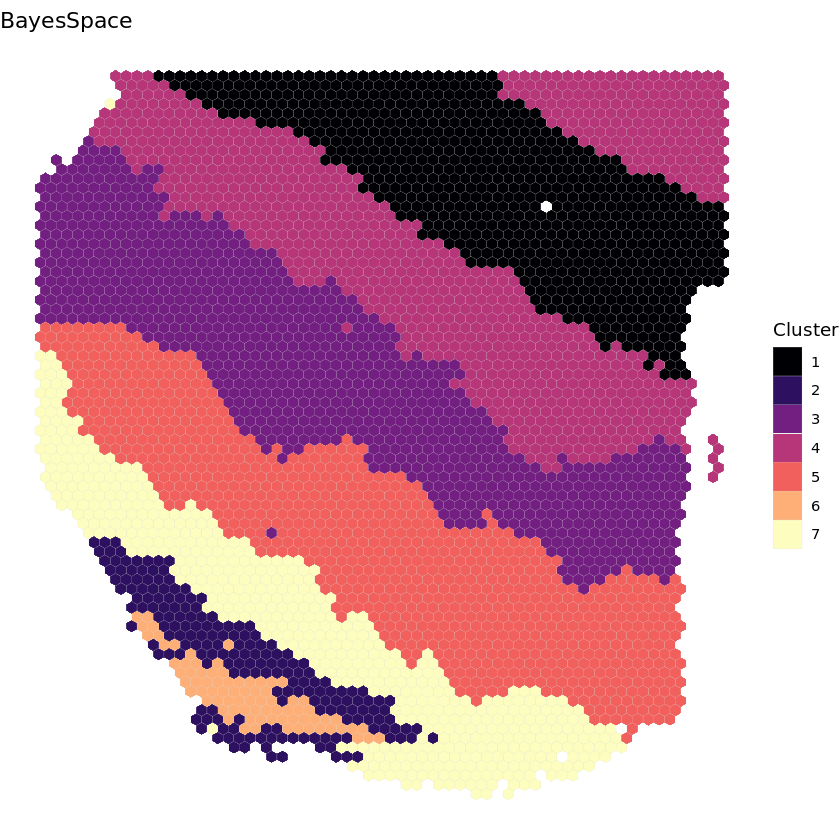

In [27]:
clusterPlot(sce, palette=NULL, size=0.05) +
  scale_fill_viridis_d(option = "A", labels = 1:n_cluster) +
  labs(title="BayesSpace")
ggsave(paste0(results_path, "/clustering.png"), dpi=300)
write.csv(sce@colData, paste0(results_path, "/clustering_label.csv"), 
          row.names=T, col.names=T, quote=F)

In [22]:
paste0(results_path, "/clustering_plot.png")

[1] "/home/uqysun19/60days/Human_Brain_spatialLIBD/other_clustering/BayesSpace_results/151507/clustering.png"

In [23]:
paste0(results_path, "/clustering_label.csv")

[1] "/home/uqysun19/60days/Human_Brain_spatialLIBD/other_clustering/BayesSpace_results/151507/clustering_label.csv"

In [25]:
for (i in 1:12){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
